In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt

## Const

In [2]:
path = "D:/Dataset/aidea-farmland-crops-autumn/train"

labels = next(os.walk(path), (None, None, []))[1]

## Helper Functions

In [10]:
def get_image_information_without_loading(path, limit=None, verbose=0):
    files, folders = [], []
    data = {key: [] for key in ['file', 'label', 'shape', 'height', 'width', 'taken_datetime', 'make', 'model']}
    for (dirpath, foldernames, filenames) in os.walk(path):
        folders.extend(foldernames), files.extend(filenames)
        break
    for idx, folder in enumerate(folders):
        folderdir = F'{path}/{folder}'
        if(verbose):
            print(F'{idx+1}/{len(folders)}, folderdir: {folderdir}')
        for file in os.listdir(folderdir)[:limit]:
            filedir = F'{path}/{folder}/{file}'
            image = Image.open(filedir)
            data['file'].append(file)
            data['label'].append(folder)
            data['shape'].append(image.size)
            data['width'].append(image.size[0])
            data['height'].append(image.size[1])
            # check image._getexif is not NoneType and has key 36867
            data['taken_datetime'].append(pd.to_datetime(image._getexif()[36867], format="%Y:%m:%d %H:%M:%S") if 
                (image._getexif() is not None and 36867 in image._getexif()) else None)
            # check image._getexif is not NoneType and has key 271
            data['make'].append(image._getexif()[271] if 
                (image._getexif() is not None and 271 in image._getexif()) else None)
            # check image._getexif is not NoneType and has key 272
            data['model'].append(image._getexif()[272] if 
                (image._getexif() is not None and 272 in image._getexif()) else None)
    return pd.DataFrame(data)


## Read Image

In [10]:
data = get_image_information_without_loading(path, limit=3, verbose=1)
data['taken_month'] = pd.to_datetime(data['taken_datetime']).dt.month
data['taken_year'] = pd.to_datetime(data['taken_datetime']).dt.year
data['taken_hour'] = pd.to_datetime(data['taken_datetime']).dt.hour

1/33, folderdir: D:/Dataset/aidea-farmland-crops-autumn/train/asparagus
2/33, folderdir: D:/Dataset/aidea-farmland-crops-autumn/train/bambooshoots
3/33, folderdir: D:/Dataset/aidea-farmland-crops-autumn/train/betel
4/33, folderdir: D:/Dataset/aidea-farmland-crops-autumn/train/broccoli
5/33, folderdir: D:/Dataset/aidea-farmland-crops-autumn/train/cauliflower
6/33, folderdir: D:/Dataset/aidea-farmland-crops-autumn/train/chinesecabbage
7/33, folderdir: D:/Dataset/aidea-farmland-crops-autumn/train/chinesechives
8/33, folderdir: D:/Dataset/aidea-farmland-crops-autumn/train/custardapple
9/33, folderdir: D:/Dataset/aidea-farmland-crops-autumn/train/grape
10/33, folderdir: D:/Dataset/aidea-farmland-crops-autumn/train/greenhouse
11/33, folderdir: D:/Dataset/aidea-farmland-crops-autumn/train/greenonion
12/33, folderdir: D:/Dataset/aidea-farmland-crops-autumn/train/kale
13/33, folderdir: D:/Dataset/aidea-farmland-crops-autumn/train/lemon
14/33, folderdir: D:/Dataset/aidea-farmland-crops-autumn/tr

In [24]:
tag_loc_coor = pd.read_csv('../data/train_tag_loc_coor.csv')
tag_loc_coor = tag_loc_coor.rename(columns={'Img': 'file', 'TARGET_FID': 'target_fid', 'COUNTYNAME': 'county_name', 'TOWNNAME': 'town_name'}, inplace=False)
tag_loc_coor = pd.merge(data, tag_loc_coor, on='file')
tag_loc_coor.head(3)

,file,label,shape,height,width,make,model,taken_datetime,taken_month,taken_year,taken_hour,target_fid,target_x,target_y,county_name,town_name,town_x,town_y
0,000b43a3-d331-47ad-99a4-4c0fa9b48298.jpg,asparagus,"(4320, 5760)",5760,4320,samsung,SM-A505GN,2019-10-28 10:22:56,10.0,2019.0,10.0,0,0,0,彰化縣,二林鎮,120.404221,23.916302
1,00172189-3156-48d7-bb1e-f0a922bc54b8.jpg,asparagus,"(3456, 4608)",4608,3456,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,彰化縣,二林鎮,120.404221,23.916302
2,002aec7b-648e-4d1f-9463-a43c0304e774.jpg,asparagus,"(900, 1600)",1600,900,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0,嘉義縣,新港鄉,120.348282,23.545908


In [25]:
tag_loc_coor.to_csv('../data/train_tag_loc_coor_describe.csv', index=None)

## Analysis

In [26]:
data = pd.read_csv('../data/train_tag_loc_coor_describe.csv')
data.describe()

,height,width,taken_month,taken_year,taken_hour,target_fid,target_x,target_y,town_x,town_y
count,89514.000000,89514.000000,55096.000000,55096.000000,55096.000000,89514.000000,89514.000000,89514.000000,89514.000000,89514.000000
mean,3444.594298,2694.117032,7.317174,2019.442428,12.252940,44756.500000,0.650770,-33.431352,120.563448,23.622252
std,1356.983470,1112.967275,3.112334,0.550250,3.143825,25840.610335,22.651154,92.331170,0.289508,0.576954
min,900.000000,640.000000,1.000000,2019.000000,4.000000,0.000000,-1462.000000,-2683.000000,120.099205,22.049339
25%,1633.000000,1225.000000,4.000000,2019.000000,10.000000,22378.250000,0.000000,0.000000,120.364716,23.404182
50%,4000.000000,3000.000000,9.000000,2019.000000,12.000000,44756.500000,0.000000,0.000000,120.483185,23.778591
75%,4208.000000,3264.000000,10.000000,2020.000000,15.000000,67134.750000,0.000000,0.000000,120.665039,23.955526
max,8000.000000,8000.000000,12.000000,2022.000000,20.000000,89513.000000,1004.000000,2043.000000,121.760269,25.083782


### View counts of years and months

In [27]:
group_by_yyyy = data.groupby(['taken_year']).size().reset_index(name='counts')
group_by_yyyy = group_by_yyyy.sort_values(by=['taken_year'], inplace=False)
group_by_mm = data.groupby(['taken_month']).size().reset_index(name='counts')
group_by_mm = group_by_mm.sort_values(by=['taken_month'], inplace=False)
group_by_yyyymm = data.groupby(['taken_year' ,'taken_month']).size().reset_index(name='counts')
group_by_yyyymm = group_by_yyyymm.sort_values(by=['taken_year', 'taken_month'], inplace=False)

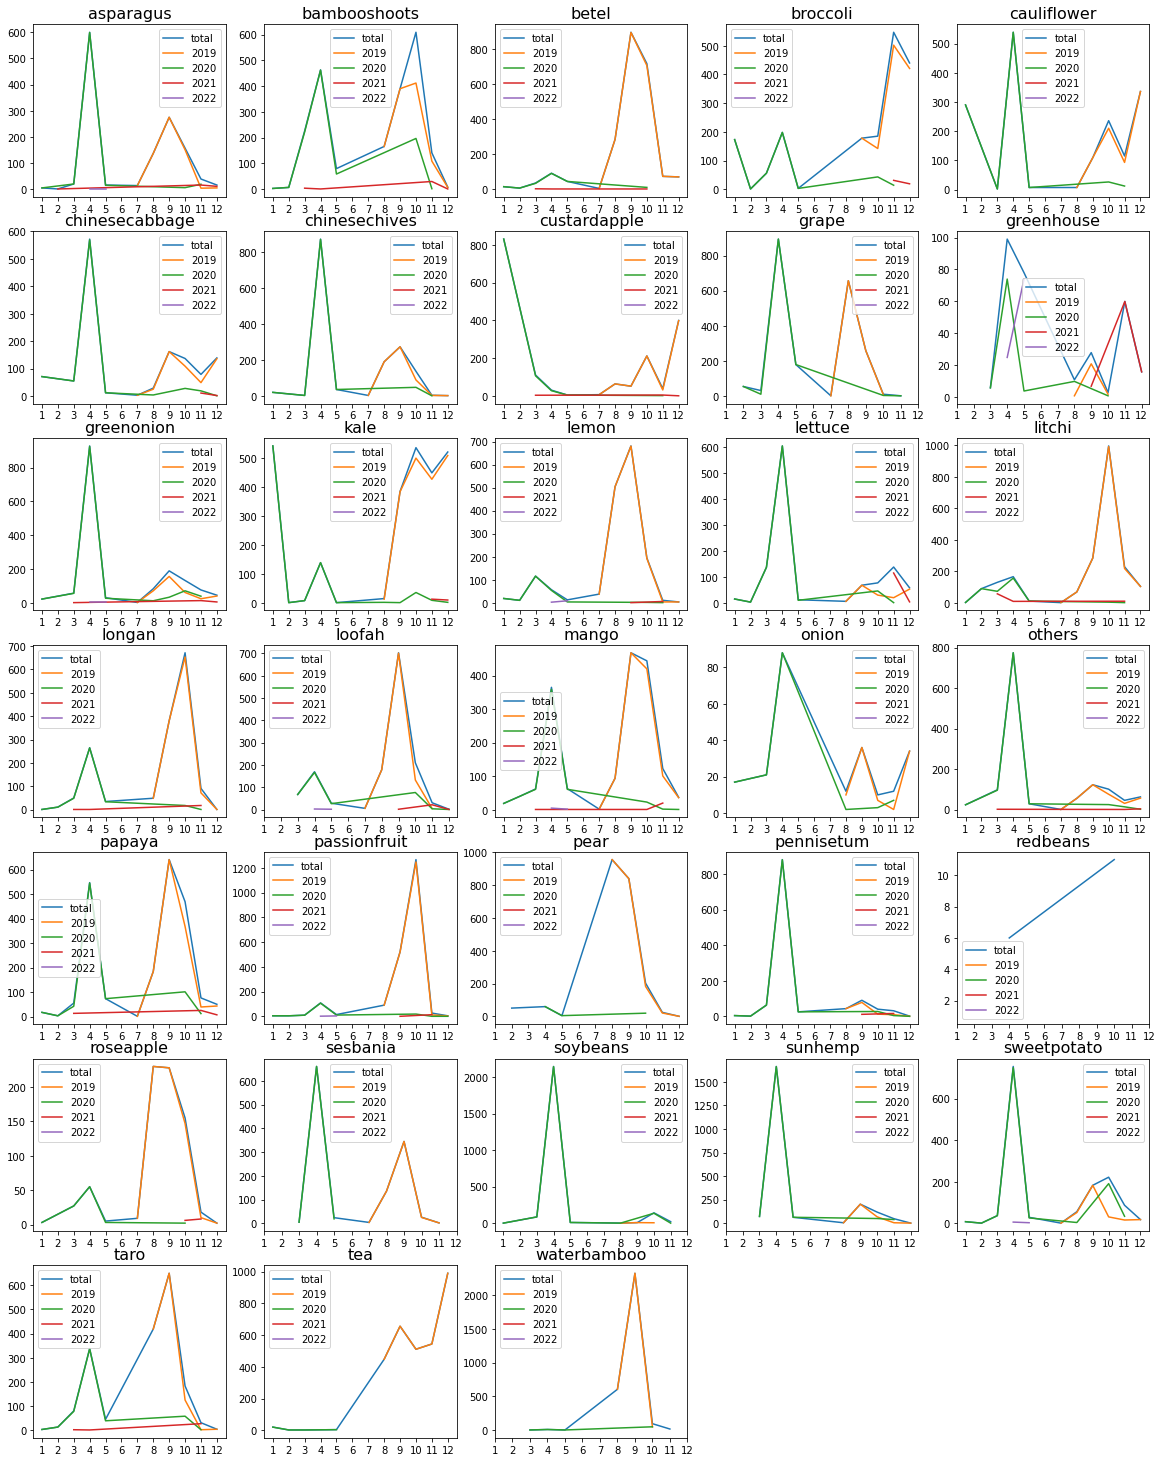

In [46]:
plt.figure(figsize=(20, 26))
# plt.suptitle(F'View counts of years and months', fontsize=24, y=0.92)
for i, label in enumerate(labels):
    plt.subplot(7, 5, i+1)
    idf = data[data['label'].eq(label)]
    igroup = idf.groupby(['taken_month']).size().reset_index(name='counts')
    igroup = igroup.sort_values(by=['taken_month'], inplace=False)
    plt.title(label, fontsize=16)
    plt.plot(igroup['taken_month'], igroup['counts'], label='total')
    for yyyy in [2019, 2020, 2021 ,2022]:
        ijgroup = idf.groupby(['taken_year', 'taken_month']).size().reset_index(name='counts')
        ijgroup = ijgroup.sort_values(by=['taken_month'], inplace=False)
        ijgroup = ijgroup[ijgroup['taken_year'].eq(yyyy)]
        plt.plot(ijgroup['taken_month'], ijgroup['counts'], label=yyyy)
    plt.xticks([*range(1,12+1)])
    plt.legend() 
plt.show()

### View counts of labels

In [40]:
group_by_label = data.groupby(['label']).size().reset_index(name='counts')
group_by_label = group_by_label.sort_values(by=['counts'], inplace=False)
group_by_label

,label,counts
0,asparagus,2041
18,onion,2126
9,greenhouse,2153
5,chinesecabbage,2162
19,others,2228
25,roseapple,2242
21,passionfruit,2331
26,sesbania,2394
14,litchi,2395
12,lemon,2395


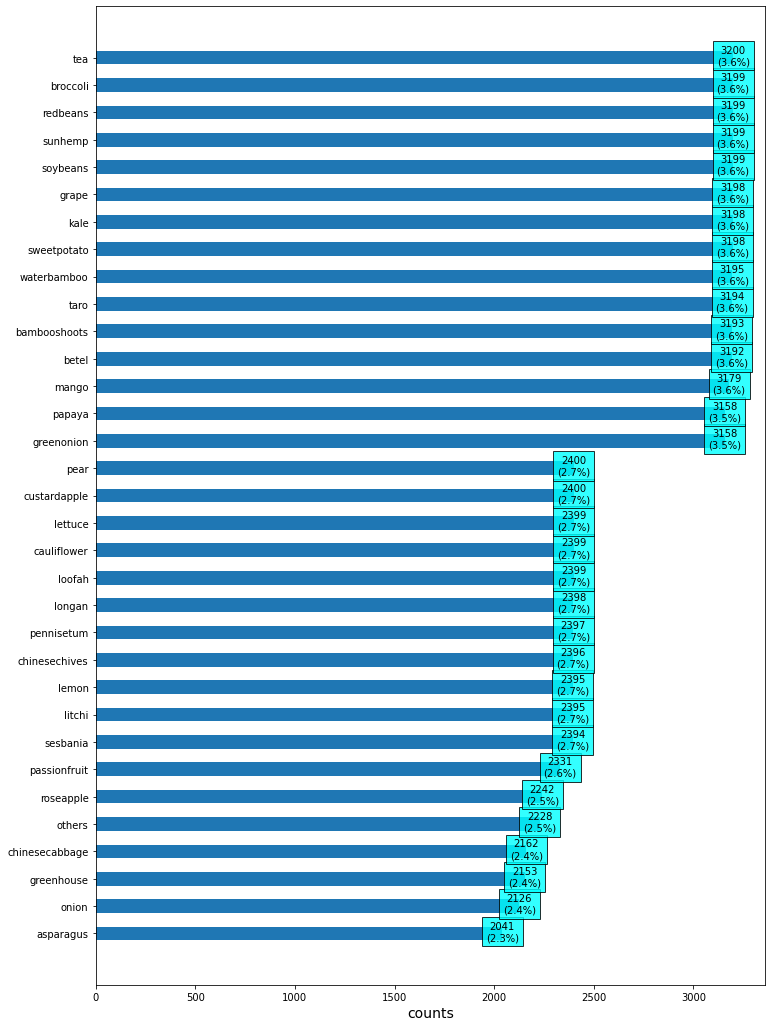

In [45]:
plt.figure(figsize=(12, 18))
# set data to plt.
plt.barh(group_by_label['label'].tolist(),
    group_by_label['counts'].tolist(), 
    height=0.5, 
    align='center')
# add label text to plt.
for i in range(len(group_by_label['label'])):
    counts = group_by_label['counts'].tolist()[i]
    proportion = counts/group_by_label['counts'].sum()
    plt.text(counts, i-.25, # (x,y)
        f"{counts}\n({round(proportion*100, 1)}%)", # label
        ha = 'center', 
        bbox = dict(facecolor = 'cyan', alpha =0.8)
    )
# add x,y lable to plt.
plt.xlabel('counts', fontsize=14)
plt.show()